In [1]:
# Matplotlib cheat sheet

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cbook import get_sample_data

#-------------
# Getting data
#-------------
# data for 1 D plot
x = np.linspace(0,7,70) # 70 equidistant points between 0 & 7
y = 2*x 
z = 10*np.random.randn(len(x))

# data for 2D plots
Y, X = np.mgrid[-7:7:70j, -7:7:70j] # 70j -> 70 points between -7 & 7
U = X**2 - Y**2
V = X**2 + Y**2

img = np.load(get_sample_data('axes_grid/bivariate_normal.npy'))


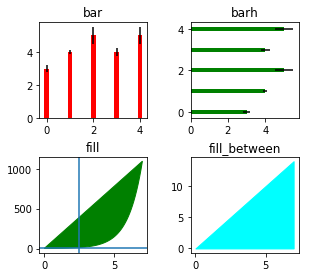

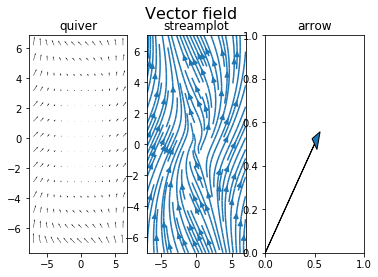

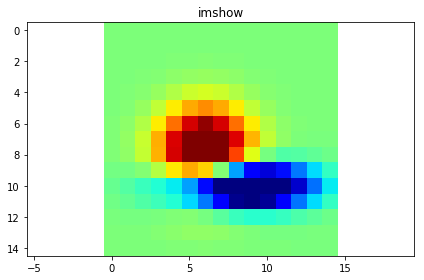

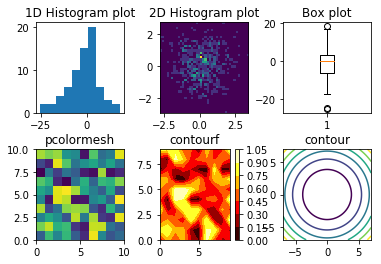

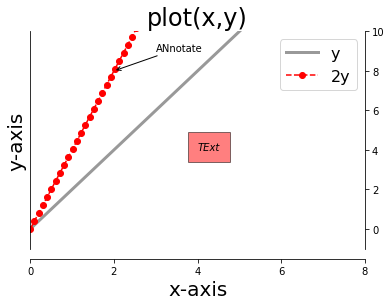

In [2]:
#---------------------
# Setting up the plots
#---------------------
fig1, ax1 = plt.subplots(nrows=2,ncols=2) # 4 subplots with 2 rows & 2 columns
fig2, ax2 = plt.subplots(ncols=3) # 3 subplots with 1 row and 3 columns
fig3, ax3 = plt.subplots(ncols=1) # No subplots. 
fig4, ax4 = plt.subplots(nrows=2,ncols=3)
fig5, ax5 = plt.subplots(ncols=1)

# BASIC PLOTS

width=0.2 # width of the bars in bar plots
std=[0.2,0.1,0.5,0.25,0.5] # Size of error bars

# ax1 has 2 rows and 2 columns -> 2 coordinates: ax1[row#,col#]
ax1[0,0].bar(np.arange(5), [3,4,5,4,5], width, color='r', yerr=std) # Vertical bar plots with error bars
ax1[0,0].set_title('bar')
ax1[0,1].barh(np.arange(5), [3,4,5,4,5], width, color='g', xerr=std) # Horizontal bar plots with error bars
ax1[0,1].set_title('barh')

ax1[1,0].fill(x,np.exp(x),color='g') # Draw FILLED POLYGONS
ax1[1,0].set_title('fill')
ax1[1,1].fill_between(x,y,color='cyan') # Fill between y-values and x-axis
ax1[1,1].set_title('fill_between')

ax1[1,0].axhline(1) # Horizontal line at y=1
ax1[1,0].axvline(2.5) # Vertical line at x=2.5


# VECTOR FIELDS

# ax2 has just 1 column of plot -> 1 coordinate: ax2[row#]
ax2[0].quiver(X[::5, ::5],Y[::5, ::5],U[::5, ::5],V[::5, ::5],units='inches') # plot 2D field of arrows
ax2[0].set_title('quiver')

ax2[1].streamplot(X,Y,U,V) 
ax2[1].set_title('streamplot')

# arrow plot-> arrow(x_base,y_base,x_length,y_length): base=base of arrow, length=length of arrow
ax2[2].arrow(0,0,0.5,0.5,head_width=0.07, head_length=0.08) 
ax2[2].set_title('arrow')


# IMAGES

# ax3 has no subplots -> no coordinates
ax3.imshow(img,cmap='jet',interpolation='nearest',vmin=-1,vmax=1) #vmin/vmax=limits of colorbar
ax3.set_title('imshow')


# DATA DISTRIBUTIONS

ax4[0,0].hist(z)
ax4[0,0].set_title('1D Histogram plot')

ax4[0,1].hist2d(np.random.randn(500),np.random.randn(500),bins=40)
ax4[0,1].set_title('2D Histogram plot')

ax4[0,2].boxplot(z)
ax4[0,2].set_title('Box plot')


# CONTOUR AND FILLED CONTOUR PLOTS

data = np.random.random((10,10))
ax4[1,0].pcolormesh(data) # Pseudocolor plot of 2D array
ax4[1,0].set_title('pcolormesh')

cbar1 = ax4[1,1].contourf(data,cmap='hot') # Filled contour plots
fig4.colorbar(cbar1,ax=ax4[1,1],orientation='vertical')
ax4[1,1].set_title('contourf')

ax4[1,2].contour(X,Y,V)
ax4[1,2].set_title('contour')

#--------------------------
# Setting FIGURE PROPERTIES
#--------------------------

ax5.plot(x, y, color='k', linestyle='-', linewidth=3, alpha=0.4)  # alpha=1 -> opaque line

ax5.plot(x, 2*y, c='r', ls='--', marker= "o") # plot 2nd line on the same graph


ax5.set_title('plot(x,y)', fontsize=24)
ax5.set_xlabel('x-axis', fontsize=20)
ax5.set_ylabel('y-axis', fontsize=20)


ax5.set(xlim=[0,max(x)], ylim=[-1,10]) #sets the limit on x & y axes

ax5.set_xticks([0,2,4,6,8]) # Sets the position of xticks

ax5.set_xticklabels([0,2,4,6,8], fontsize= 20) # Displays the text at the above locations

ax5.yaxis.set_ticks_position('right')  # Shows TICKS ONLY on the right side instead of both right & left 


ax5.spines['top'].set_visible(0) # No SPINES (figure border line) at the top
ax5.spines['bottom'].set_position(('outward',10)) # Move bottom axis line outward

ax5.legend(['y','2y'], loc='best', fontsize=16) # loc = 'upper left' etc.

ax5.text(4,4,'TExt', style='italic', fontsize=10, bbox={'facecolor':'red', 'alpha':0.5, 'pad':10})

ax5.annotate('ANnotate',xy=(2,8),xytext=(3,9),  # xy=coordinates of arrow tip, xytext=location of text
                   arrowprops=dict(facecolor='black', arrowstyle="->", connectionstyle="arc3"))


ax3.axis('equal') # Same aspect ratio for both axes

fig3.tight_layout() # tune the subplots' parameters to make them fit into the figure area

fig2.suptitle('Vector field', fontsize=16)  # MAIN TITLE for subplots

# Adjust space between subplots
fig1.subplots_adjust(wspace=0.4,hspace=0.4) # set horizontal and vertical blank space between subplots
fig1.subplots_adjust(left=0.2,right=0.8,top=0.9,bottom=0.1)

fig4.subplots_adjust(wspace=0.4,hspace=0.4)

plt.show() # Show all the figures

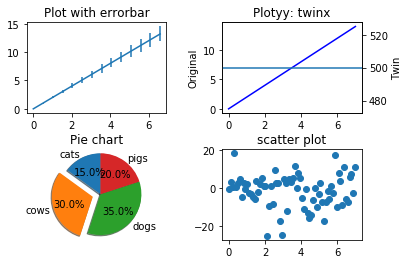

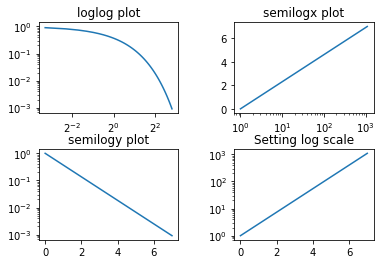

In [3]:
#-------------------
# OTHER COMMON PLOTS
#-------------------
fig6, ax6 = plt.subplots(nrows=2,ncols=2)
fig7, ax7 = plt.subplots(nrows=2,ncols=2)

ax6[0,0].errorbar(x[::5],y[::5],yerr=y[::5]*0.1)
ax6[0,0].set_title('Plot with errorbar')

ax6[0,1].plot(x,y,'b')
ax6[0,1].set_title('Plotyy: twinx')
ax6[0,1].set_ylabel('Original')
axtwin = ax6[0,1].twinx()
axtwin.axhline(500)
axtwin.set_ylabel('Twin')

labels = 'cats', 'cows', 'dogs', 'pigs'
sizes = [15, 30, 35, 20]
explode = (0, 0.2, 0, 0)  # "explode" the 2nd slice (i.e. 'cows')
ax6[1,0].pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax6[1,0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax6[1,0].set_title('Pie chart')

ax6[1,1].scatter(x,z)
ax6[1,1].set_title('scatter plot')

fig6.subplots_adjust(wspace=0.4,hspace=0.4)


ax7[0,0].loglog(x, np.exp(-x), basex=2, basey=10)
ax7[0,0].set_title('loglog plot')

ax7[0,1].semilogx(np.exp(x), x)
ax7[0,1].set_title('semilogx plot')

ax7[1,0].semilogy(x, np.exp(-x))
ax7[1,0].set_title('semilogy plot')

ax7[1,1].plot(x, np.exp(x))
ax7[1,1].set_yscale("log", nonposx='clip')
ax7[1,1].set_title('Setting log scale')

fig7.subplots_adjust(wspace=0.4,hspace=0.4)


# Save figure in jpg format with a resolution of 150 pixels(dots) per inch
fig7.savefig('fig7.jpg',dpi=150)

plt.show() # Show all the figures

plt.cla() # clear currently active axis
plt.clf() # clears current figure but leaves the window open to be used for other plots
plt.close() # close current window